In [36]:
import networkx as nx
import importlib
from collections import deque
import matplotlib.pyplot as plt
import production_graph as pg
import planner as pln

In [37]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Ejemplo de uso:
G = nx.DiGraph()
G.add_edges_from([
    ("A","C"),("B","C"),("C","D")
])




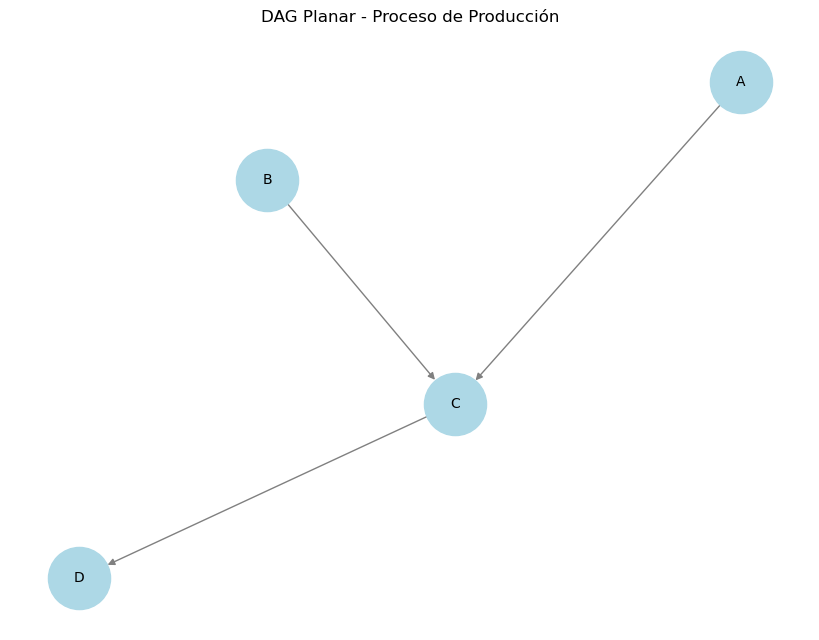

In [39]:

# Graficar el DAG con la disposición personalizada
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10, arrows=True)
plt.title("DAG Planar - Proceso de Producción")
plt.show()

In [40]:
print(list(nx.topological_sort(G)))

['A', 'B', 'C', 'D']


In [41]:
proceso = pln.Proceso_productivo(G)

In [42]:
proceso.get_grafo()

In [43]:
plan = [0,0,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1]

In [44]:
proceso.crear_plan_produccion(plan)

[('A', 'comprar', 'ZF'),
 ('B', 'comprar', 'ZF'),
 ('C', 'producir', 'ZF'),
 ('D', 'producir', 'NCT')]

In [45]:
proceso = pln.Proceso_productivo(G)

In [46]:
planeador = pln.Planner(proceso)

In [47]:
planeador._proceso_productivo.crear_plan_produccion(plan)

[('A', 'comprar', 'ZF'),
 ('B', 'comprar', 'ZF'),
 ('C', 'producir', 'ZF'),
 ('D', 'producir', 'NCT')]

In [48]:
plan

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]

In [49]:
proceso.get_clasificacion_bienes()

{'A': 'bien_primario',
 'B': 'bien_primario',
 'C': 'bien_intermedio',
 'D': 'bien_final'}

In [50]:
planeador.crear_plan_produccion(plan)

[('A', 'comprar', 'ZF'),
 ('B', 'comprar', 'ZF'),
 ('C', 'producir', 'ZF'),
 ('D', 'producir', 'NCT')]

In [52]:
prueba = planeador.ejecutar_plan(plan)

In [53]:
prueba

[(1, ('ZF', 'MKT'), 'compra', 'A'),
 (2, ('ZF', 'MKT'), 'compra', 'B'),
 (3, ('ZF',), 'produccion', 'C'),
 (4, ('NCT', 'ZF'), 'compra', 'C'),
 (4, ('NCT',), 'produccion', 'D')]

In [54]:
prueba[0]

(1, ('ZF', 'MKT'), 'compra', 'A')